In [1]:
from IR import VasicekModel, CIRModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Vasicek érzékenység vizsgálat:

In [2]:
frates = np.array([0.046, 0.05, 0.053, 0.046, 0.041, 0.045, 0.0475, 0.05, 0.051, 0.045, 0.045, 0.048, 0.0475, 0.047])
kk = 0.0045
theta = 0.1
sigma_v = 0.01
r0 = 0.046 
K = 0.047 
dt = 0.5 
N = 14

In [3]:
vasi_p = VasicekModel(kk = kk, theta = theta, sigma = sigma_v, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
print(vasi_p.price())

0.01997611629379158


In [4]:
kk_erz = np.linspace(0.0001, 0.01, 100)

kk_ar = np.zeros(100)

for i in range(len(kk_erz)):
    vasi_p = VasicekModel(kk = kk_erz[i], theta = theta, sigma = sigma_v, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    kk_ar[i] = vasi_p.price()

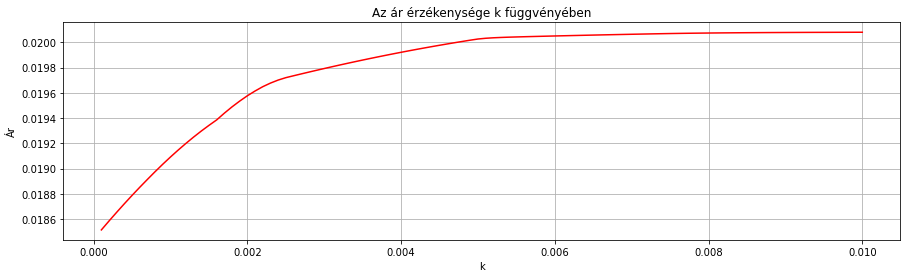

In [5]:
plt.figure(figsize = (15, 4))
sns.lineplot(kk_erz, kk_ar, color = 'r')
plt.title('Az ár érzékenysége k függvényében')
plt.xlabel('k')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [6]:
th_erz = np.linspace(0.01, 0.50, 100)

th_ar = np.zeros(100)

for i in range(len(th_erz)):
    vasi_p = VasicekModel(kk = kk, theta = th_erz[i], sigma = sigma_v, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    th_ar[i] = vasi_p.price()

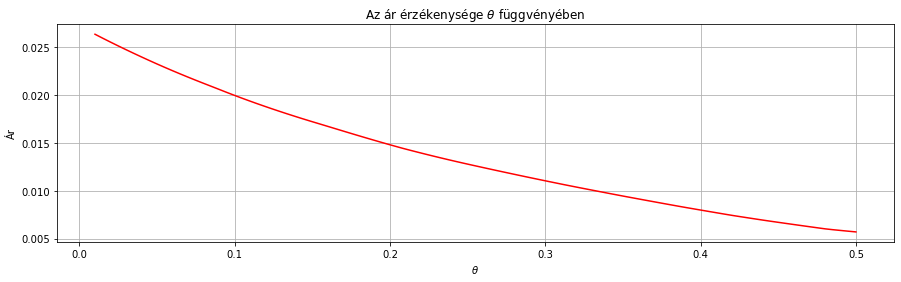

In [7]:
plt.figure(figsize = (15, 4))
sns.lineplot(th_erz, th_ar, color = 'r')
plt.title('Az ár érzékenysége '+r'$\theta$'+' függvényében')
plt.xlabel(r'$\theta$')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [8]:
sig_erz = np.linspace(0.001, 0.50, 100)

sig_ar = np.zeros(100)

for i in range(len(sig_erz)):
    vasi_p = VasicekModel(kk = kk, theta = theta, sigma = sig_erz[i], r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    sig_ar[i] = vasi_p.price()

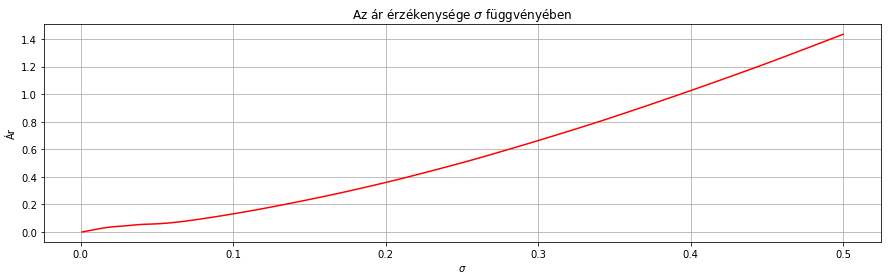

In [9]:
plt.figure(figsize = (15, 4))
sns.lineplot(sig_erz, sig_ar, color = 'r')
plt.title('Az ár érzékenysége '+r'$\sigma$'+' függvényében')
plt.xlabel(r'$\sigma$')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [10]:
th_sig_ar = np.zeros((100, 100))

for i in range(len(th_erz)):
    for j in range(len(sig_erz)):
        vasi_p = VasicekModel(kk = kk, theta = th_erz[i], sigma = sig_erz[j], r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
        th_sig_ar[i][j] = vasi_p.price()

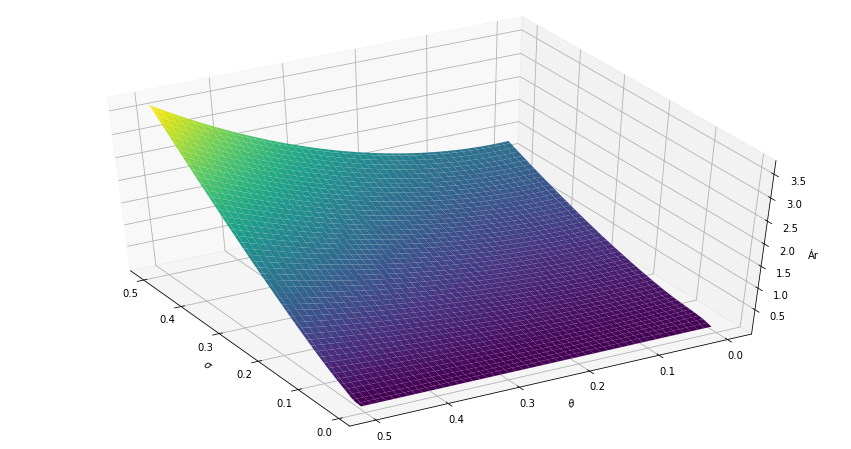

In [11]:
th_grid, sig_grid = np.meshgrid(th_erz, sig_erz)

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
ax.plot_surface(th_grid, sig_grid, th_sig_ar, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\theta$')
ax.set_zlabel('Ár')
ax.view_init(45, 150)
plt.show()

## CIR érzékenység vizsgálat:

In [12]:
frates = np.array([0.046, 0.05, 0.053, 0.046, 0.041, 0.045, 0.0475, 0.05, 0.051, 0.045, 0.045, 0.048, 0.0475, 0.047])
alpha = 0.0045
beta = 0.1
sigma_c = 0.0447
r0 = 0.046 
K = 0.047 
dt = 0.5 
N = 14

In [13]:
cir_p = CIRModel(alpha = alpha, beta = beta, sigma = sigma_c, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
print(cir_p.price())

0.01932599820562226


In [14]:
alp_erz = np.linspace(0.0001, 0.01, 100)

alp_ar = np.zeros(100)

for i in range(len(alp_erz)):
    cir_p = CIRModel(alpha = alp_erz[i], beta = beta, sigma = sigma_c, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    alp_ar[i] = cir_p.price()

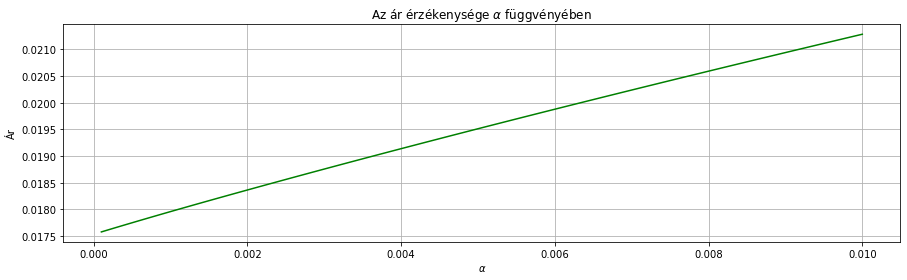

In [15]:
plt.figure(figsize = (15, 4))
sns.lineplot(alp_erz, alp_ar, color = 'g')
plt.title('Az ár érzékenysége '+r'$\alpha$'+' függvényében')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [16]:
bet_erz = np.linspace(0.001, 0.25, 100)

bet_ar = np.zeros(100)

for i in range(len(bet_erz)):
    cir_p = CIRModel(alpha = alpha, beta = bet_erz[i], sigma = sigma_c, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    bet_ar[i] = cir_p.price()

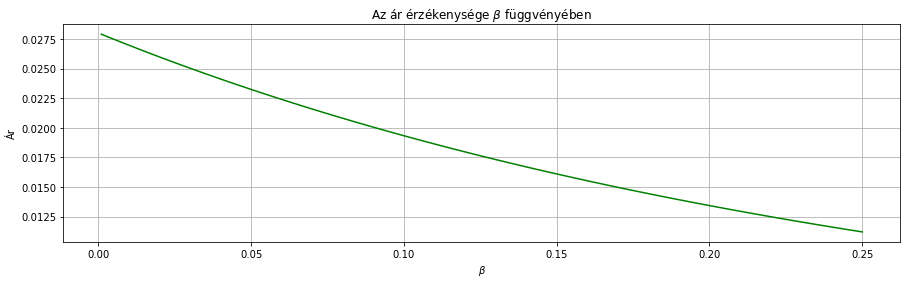

In [17]:
plt.figure(figsize = (15, 4))
sns.lineplot(bet_erz, bet_ar, color = 'g')
plt.title('Az ár érzékenysége '+r'$\beta$'+' függvényében')
plt.xlabel(r'$\beta$')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [18]:
sig_erz = np.linspace(0.02, 0.1, 100)

sig_ar = np.zeros(100)

for i in range(len(bet_erz)):
    cir_p = CIRModel(alpha = alpha, beta = beta, sigma = sig_erz[i], r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
    sig_ar[i] = cir_p.price()

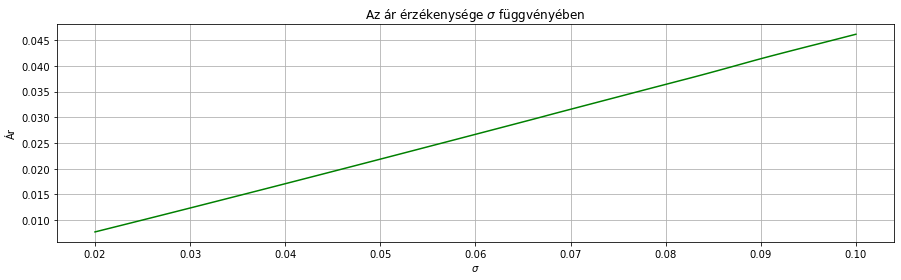

In [19]:
plt.figure(figsize = (15, 4))
sns.lineplot(sig_erz, sig_ar, color = 'g')
plt.title('Az ár érzékenysége '+r'$\sigma$'+' függvényében')
plt.xlabel(r'$\sigma$')
plt.ylabel('Ár')
plt.grid(True)
plt.show()

In [20]:
alp_sig_ar = np.zeros((100, 100))

for i in range(len(alp_erz)):
    for j in range(len(sig_erz)):
        cir_p = CIRModel(alpha = alp_erz[i], beta = beta, sigma = sig_erz[j], r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
        alp_sig_ar[i][j] = cir_p.price()

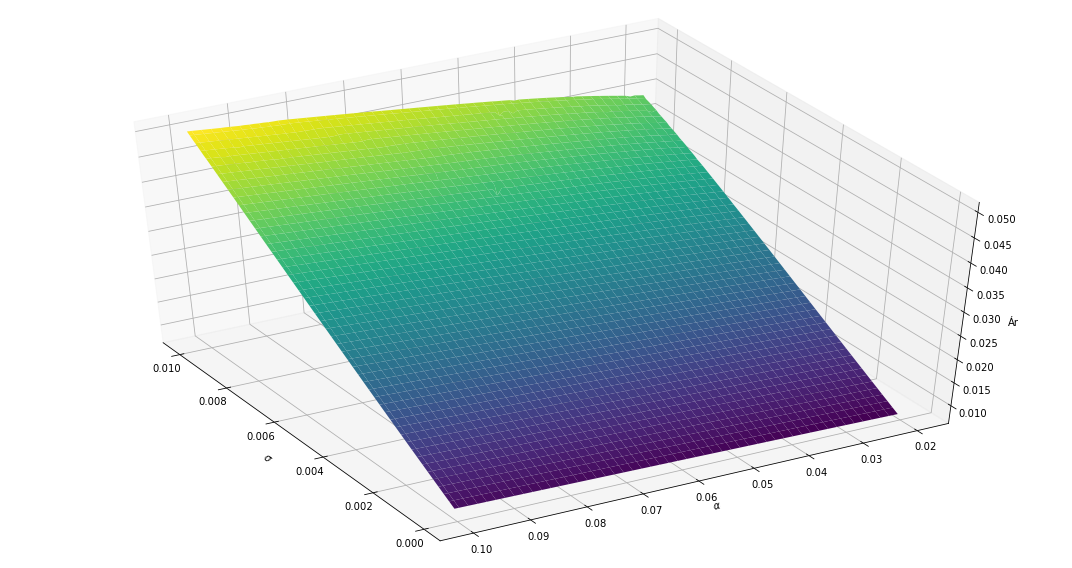

In [21]:
alp_grid, sig_grid = np.meshgrid(alp_erz, sig_erz)

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
ax.plot_surface(alp_grid, sig_grid, alp_sig_ar, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel('Ár')
ax.view_init(45, 150)
plt.tight_layout()
plt.show()

In [22]:
bet_sig_ar = np.zeros((100, 100))

for i in range(len(bet_erz)):
    for j in range(len(sig_erz)):
        cir_p = CIRModel(alpha = alpha, beta = bet_erz[i], sigma = sig_erz[j], r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
        bet_sig_ar[i][j] = cir_p.price()

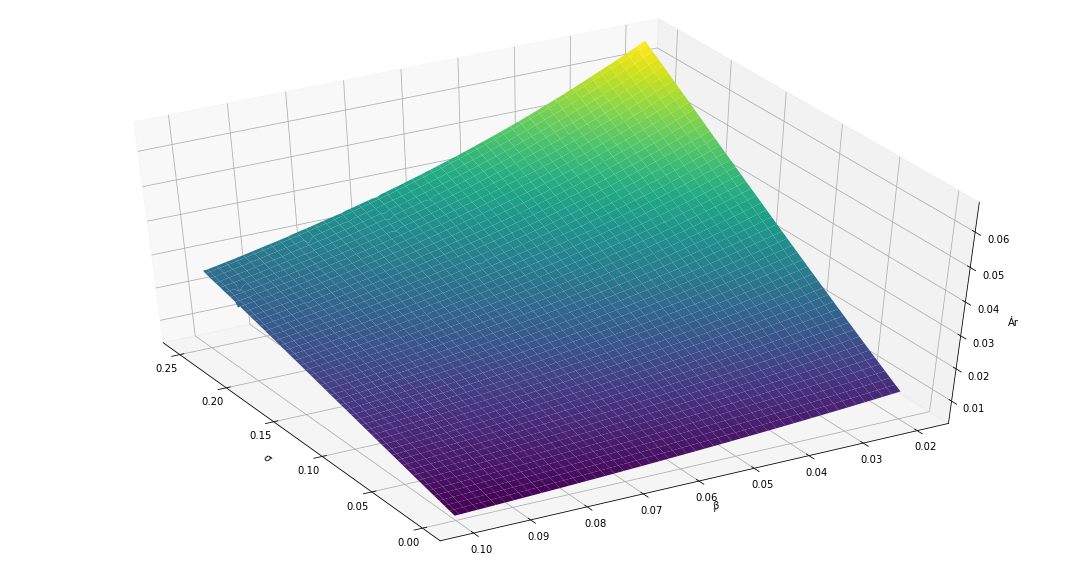

In [23]:
bet_grid, sig_grid = np.meshgrid(bet_erz, sig_erz)

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
ax.plot_surface(bet_grid, sig_grid, bet_sig_ar, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel('Ár')
ax.view_init(45, 150)
plt.tight_layout()
plt.show()

In [24]:
alp_bet_ar = np.zeros((100, 100))

for i in range(len(alp_erz)):
    for j in range(len(bet_erz)):
        cir_p = CIRModel(alpha = alp_erz[i], beta = bet_erz[j], sigma = sigma_c, r0 = r0, K = K, dt = dt, N = N, forward_rates = frates)
        alp_bet_ar[i][j] = cir_p.price()

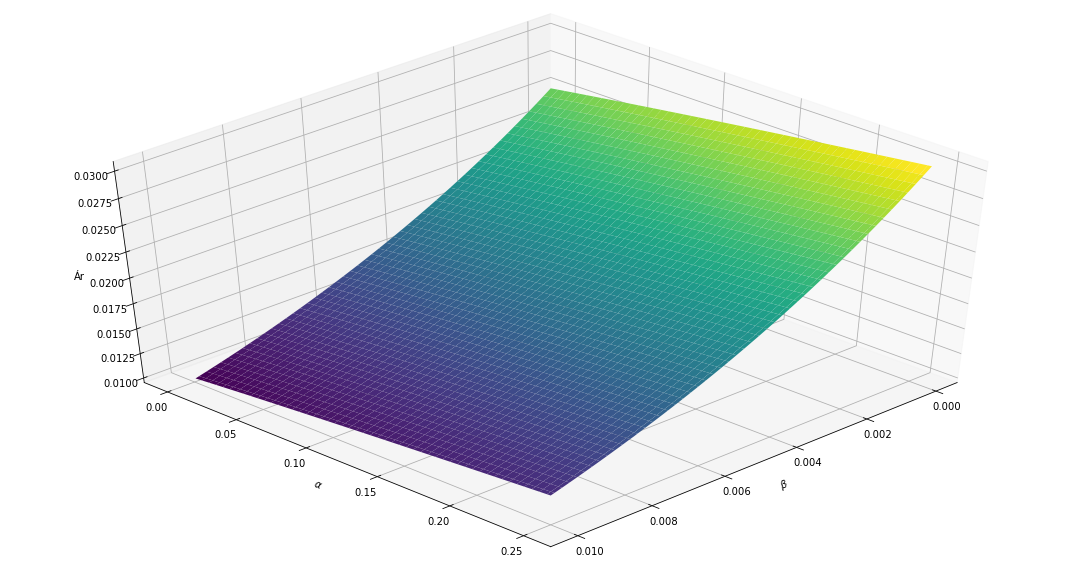

In [25]:
alp_grid, bet_grid = np.meshgrid(alp_erz, bet_erz)

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
ax.plot_surface(alp_grid, bet_grid, alp_bet_ar, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel('Ár')
ax.view_init(45, 45)
plt.tight_layout()
plt.show()

## Közös érzékenység:

In [26]:
r0_erz = np.linspace(0.025, 0.075, 100)

r0_vas = np.zeros(100)
r0_cir = np.zeros(100)

for i in range(len(r0_erz)):
    vasi_p = VasicekModel(kk = kk, theta = theta, sigma = sigma_v, r0 = r0_erz[i], K = K, dt = dt, N = N, forward_rates = frates)
    cir_p = CIRModel(alpha = alpha, beta = beta, sigma = sigma_c, r0 = r0_erz[i], K = K, dt = dt, N = N, forward_rates = frates)
    r0_vas[i] = vasi_p.price()
    r0_cir[i] = cir_p.price()

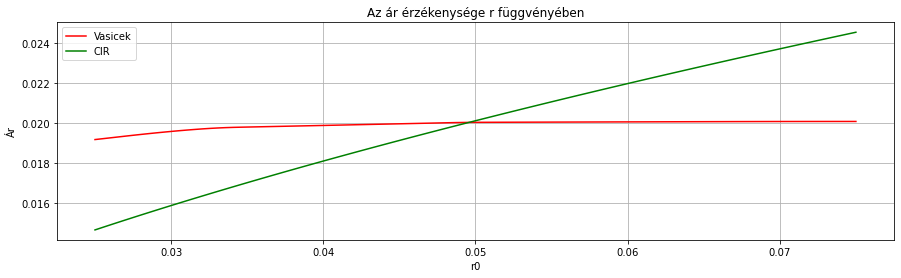

In [27]:
plt.figure(figsize = (15, 4))
sns.lineplot(r0_erz, r0_vas, color = 'r', label = 'Vasicek')
sns.lineplot(r0_erz, r0_cir, color = 'g', label = 'CIR')
plt.xlabel('r0')
plt.ylabel('Ár')
plt.title('Az ár érzékenysége r függvényében')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

In [28]:
K_erz = np.linspace(0.025, 0.06, 100)

K_vas = np.zeros(100)
K_cir = np.zeros(100)

for i in range(len(r0_erz)):
    vasi_p = VasicekModel(kk = kk, theta = theta, sigma = sigma_v, r0 = r0, K = K_erz[i], dt = dt, N = N, forward_rates = frates)
    cir_p = CIRModel(alpha = alpha, beta = beta, sigma = sigma_c, r0 = r0, K = K_erz[i], dt = dt, N = N, forward_rates = frates)
    K_vas[i] = vasi_p.price()
    K_cir[i] = cir_p.price()

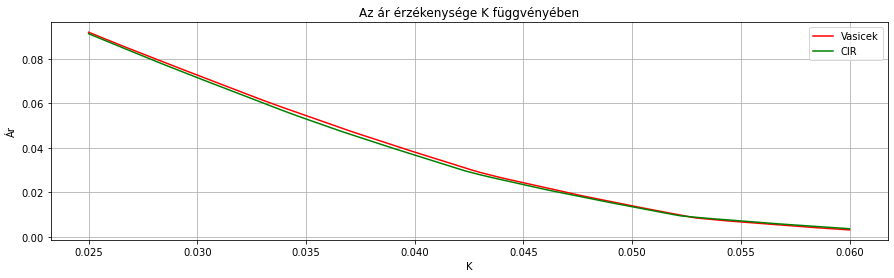

In [29]:
plt.figure(figsize = (15, 4))
sns.lineplot(K_erz, K_vas, color = 'r', label = 'Vasicek')
sns.lineplot(K_erz, K_cir, color = 'g', label = 'CIR')
plt.xlabel('K')
plt.ylabel('Ár')
plt.title('Az ár érzékenysége K függvényében')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()